In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, MaxPool1D, Convolution1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

In [3]:
#Loading the ptbdb dats set
abnormal     = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datafiles/ptbdb_abnormal.csv", header = None)
normal       = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datafiles/ptbdb_normal.csv", header = None)

In [4]:
abnormal.shape

(10506, 188)

In [5]:
normal.shape

(4046, 188)

In [6]:
abnormal[187].unique()

array([1.])

In [7]:
normal[187].unique()

array([0.])

In [8]:
#Combining abnormal and normal
ptbdb_data = pd.merge(abnormal, normal, how='outer')
ptbdb_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14548,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14549,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14550,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import resample
import random
import matplotlib.pyplot as plt
import seaborn as sns
ptbdb_data_lbl0 = resample(ptbdb_data[ptbdb_data[187]==0], replace=True, n_samples=15000, random_state=113)
ptbdb_data_lbl1 = resample(ptbdb_data[ptbdb_data[187]==1], replace=True, n_samples=15000, random_state=113)

In [10]:
train= pd.concat([ptbdb_data_lbl0, ptbdb_data_lbl1])
labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

Count in each label: 
0    15000
1    15000
Name: 187, dtype: int64


In [11]:
#Feature Scaling
x = ptbdb_data.iloc[:, :-1].values
y = ptbdb_data.iloc[:, -1].values

In [12]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [13]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#**KNeighbors Classification**

In [14]:
#Training KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
KNN.fit(x_train, y_train)    

KNeighborsClassifier(n_neighbors=15)

In [15]:
#Predicting the test values
pred_KNN = KNN.predict(x_test)

In [16]:
#Obtaining confusion matrix, accuracy score and classification report 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm_KNN = confusion_matrix(y_test, pred_KNN)
print(cm_KNN)
a_KNN = accuracy_score(y_test, pred_KNN)
print("Accuarcy of the model",a_KNN)
print(classification_report(y_test, pred_KNN))

[[ 857  169]
 [ 221 2391]]
Accuarcy of the model 0.8927982407916437
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81      1026
         1.0       0.93      0.92      0.92      2612

    accuracy                           0.89      3638
   macro avg       0.86      0.88      0.87      3638
weighted avg       0.89      0.89      0.89      3638



#**Random Forest Classification**

In [17]:
#Training RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
RFC.fit(x_train, y_train)    

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [18]:
#Predicting the test values 
pred_RFC = RFC.predict(x_test)

In [19]:
#Obtaining confusion matrix, accuracy score and classififcation report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm_RFC = confusion_matrix(y_test, pred_RFC)
print(cm_RFC)
a_RFC = accuracy_score(y_test, pred_RFC)
print("Accuarcy of the model",a_RFC)
print(classification_report(y_test, pred_RFC))

[[ 926  100]
 [  44 2568]]
Accuarcy of the model 0.960417811984607
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93      1026
         1.0       0.96      0.98      0.97      2612

    accuracy                           0.96      3638
   macro avg       0.96      0.94      0.95      3638
weighted avg       0.96      0.96      0.96      3638



#**SVM**

In [20]:
#Training the SVM model 
from sklearn.svm import SVC
SVM = SVC(kernel = 'poly', degree=3, probability=True)
SVM.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [21]:
pred_SVM = SVM.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm_SVM = confusion_matrix(y_test, pred_SVM)
print(cm_SVM)
a_SVM = accuracy_score(y_test, pred_SVM)
print("Accuarcy of the model",a_SVM)
print(classification_report(y_test, pred_SVM))


[[ 470  556]
 [  50 2562]]
Accuarcy of the model 0.8334249587685542
              precision    recall  f1-score   support

         0.0       0.90      0.46      0.61      1026
         1.0       0.82      0.98      0.89      2612

    accuracy                           0.83      3638
   macro avg       0.86      0.72      0.75      3638
weighted avg       0.84      0.83      0.81      3638



#**Voting Classifier**

In [23]:
#Training voting classifier
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('svm', SVM), ('knn', KNN), ('rfc', RFC)])
model.fit(x_train, y_train)

#Predicting the score
model.score(x_test, y_test)

0.9356789444749862

#**Ada Boost**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


max_estimators = 50
ada_boost = AdaBoostClassifier(RandomForestClassifier(max_depth = 1, # Just a stump.
                                      random_state = np.random.RandomState(0)),
                               n_estimators = max_estimators,
                               random_state = np.random.RandomState(0))

# Fit all estimators.
ada_boost.fit(x_train, y_train)


AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1,
                                                         random_state=RandomState(MT19937) at 0x7F4C83EC8E20),
                   random_state=RandomState(MT19937) at 0x7F4C80E3D7C0)

In [25]:
ada_boost.score(x_test, y_test)

0.8732820230896097

#**XGBoost**

In [26]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# fit model on training data
model = XGBClassifier()
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set,verbose=True)

# make predictions for test data
predictions = model.predict(x_test)

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

[0]	validation_0-error:0.223749	validation_0-logloss:0.650988	validation_1-error:0.236119	validation_1-logloss:0.652506
[1]	validation_0-error:0.202309	validation_0-logloss:0.615488	validation_1-error:0.216603	validation_1-logloss:0.618629
[2]	validation_0-error:0.172439	validation_0-logloss:0.585052	validation_1-error:0.186916	validation_1-logloss:0.589293
[3]	validation_0-error:0.183801	validation_0-logloss:0.559303	validation_1-error:0.197911	validation_1-logloss:0.564706
[4]	validation_0-error:0.190947	validation_0-logloss:0.537393	validation_1-error:0.203958	validation_1-logloss:0.543923
[5]	validation_0-error:0.179586	validation_0-logloss:0.517902	validation_1-error:0.193513	validation_1-logloss:0.525001
[6]	validation_0-error:0.181143	validation_0-logloss:0.501608	validation_1-error:0.194338	validation_1-logloss:0.509438
[7]	validation_0-error:0.175096	validation_0-logloss:0.486334	validation_1-error:0.18994	validation_1-logloss:0.495676
[8]	validation_0-error:0.173172	validatio

#**Learning Curve for XGBoost**

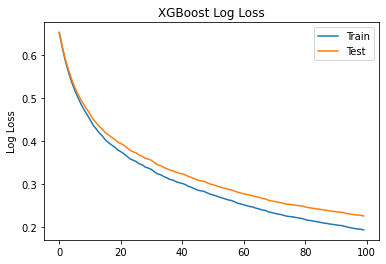

In [27]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

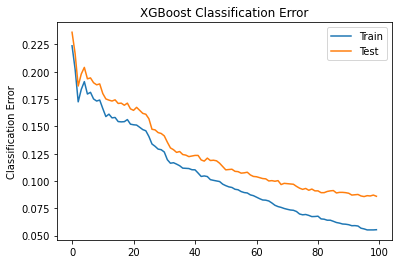

In [28]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

#**ANN**

In [29]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = pd.DataFrame( columns=["Accuracy","Precision","Recall"])
#predictions = np.zeros(shape=(10000,7))
row_index = 0
for i in range(7):
        # bootstrap sampling  
        boot_train = resample(x_train,y_train,replace=True, n_samples=40000, random_state=None)
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=x_train[0].shape),
            tf.keras.layers.Dense(256, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
  
        # compile the model
        model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

        # Train the model
        model.fit(x_train,y_train,epochs=5,batch_size=32, validation_data=(x_test, y_test) )
        # evaluate the model
        model.evaluate(x_test, y_test)

Epoch 1/5
342/342 [==============================] - 4s 8ms/step - loss: 0.4179 - accuracy: 0.8214 - val_loss: 0.2763 - val_accuracy: 0.8843
Epoch 2/5
342/342 [==============================] - 3s 7ms/step - loss: 0.2445 - accuracy: 0.9039 - val_loss: 0.2260 - val_accuracy: 0.9137
Epoch 3/5
342/342 [==============================] - 3s 8ms/step - loss: 0.1783 - accuracy: 0.9307 - val_loss: 0.1932 - val_accuracy: 0.9203
Epoch 4/5
342/342 [==============================] - 2s 7ms/step - loss: 0.1545 - accuracy: 0.9454 - val_loss: 0.1593 - val_accuracy: 0.9390
Epoch 5/5
114/114 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.9349
Epoch 1/5
342/342 [==============================] - 4s 8ms/step - loss: 0.4635 - accuracy: 0.7769 - val_loss: 0.3322 - val_accuracy: 0.8648
Epoch 2/5
342/342 [==============================] - 2s 7ms/step - loss: 0.2601 - accuracy: 0.8955 - val_loss: 0.3028 - val_accuracy: 0.8942
Epoch 3/5
342/342 [==============================] - 2s

In [30]:
import numpy 
cvscores1 = []
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores1.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores1), numpy.std(cvscores1)))
      

accuracy: 92.14%
92.14% (+/- 0.00%)


#**CNN**

In [31]:
df1 = ptbdb_data.sample(frac = 1)

test = df1.head(3638)
print(test.shape)

train = df1.tail(10914)
print(train.shape)

(3638, 188)
(10914, 188)


Count in each label: 
1    7904
0    3010
Name: 187, dtype: int64


<BarContainer object of 2 artists>

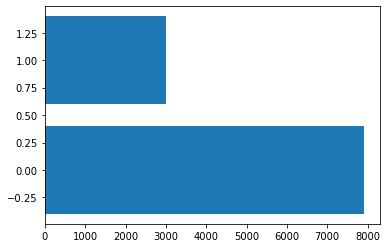

In [32]:
label_names = ['Normal Beats', 'Abnormal Beats']
labels = train[187].astype('int64')   # last column has the labels

print("Count in each label: ")
print(labels.value_counts())

plt.barh(list(set(labels)), list(labels.value_counts()))

In [33]:
def gaussian_noise(signal):
    noise = np.random.normal(0,0.05,187)
    return signal + noise

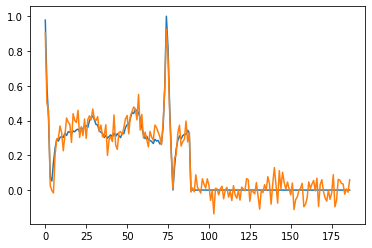

In [34]:
sample = ptbdb_data_lbl0.sample(1).values[0]

sample_with_noise = gaussian_noise(sample[:187])

plt.subplot(1, 1, 1)

plt.plot(sample[:187])
plt.plot(sample_with_noise)

In [35]:

ytrain = tensorflow.keras.utils.to_categorical(train[187])
ytest = tensorflow.keras.utils.to_categorical(test[187])

# Input to the model
xtrain = train.values[:, :187]
xtest = test.values[:, :187]

# Adding noise
for i in range(xtrain.shape[0]):
    xtrain[i, :187] = gaussian_noise(xtrain[i, :187])

In [36]:
xtrain = np.expand_dims(xtrain, 2)
xtest = np.expand_dims(xtest, 2)

print("Shape of training data: ")
print("Input: ", xtrain.shape)
print("Output: ", ytrain.shape)

print("\nShape of test data: ")
print("Input: ", xtest.shape)
print("Output: ", ytest.shape)

Shape of training data: 
Input:  (10914, 187, 1)
Output:  (10914, 2)

Shape of test data: 
Input:  (3638, 187, 1)
Output:  (3638, 2)


In [37]:
model = Sequential()
model.add(Conv1D(64, 6, activation = 'relu', input_shape = xtrain[0].shape))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Conv1D(64, 6, activation = 'relu'))
model.add(MaxPool1D(3, 2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer = tensorflow.keras.optimizers.Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 182, 64)           448       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 90, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 85, 64)            24640     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 42, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 37, 64)            24640     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 18, 64)          

In [38]:
history = model.fit(xtrain, ytrain, epochs = 8, batch_size = 32, validation_data = (xtest, ytest))


Epoch 1/8
342/342 [==============================] - 12s 32ms/step - loss: 0.4150 - accuracy: 0.7949 - val_loss: 0.3560 - val_accuracy: 0.8183
Epoch 2/8
342/342 [==============================] - 11s 31ms/step - loss: 0.2720 - accuracy: 0.8795 - val_loss: 0.2003 - val_accuracy: 0.9145
Epoch 3/8
342/342 [==============================] - 11s 31ms/step - loss: 0.1853 - accuracy: 0.9259 - val_loss: 0.1555 - val_accuracy: 0.9417
Epoch 4/8
342/342 [==============================] - 11s 31ms/step - loss: 0.1468 - accuracy: 0.9430 - val_loss: 0.1430 - val_accuracy: 0.9426
Epoch 5/8
342/342 [==============================] - 11s 31ms/step - loss: 0.1251 - accuracy: 0.9525 - val_loss: 0.0973 - val_accuracy: 0.9645
Epoch 6/8
342/342 [==============================] - 11s 31ms/step - loss: 0.1067 - accuracy: 0.9577 - val_loss: 0.1117 - val_accuracy: 0.9579
Epoch 7/8
342/342 [==============================] - 11s 31ms/step - loss: 0.0898 - accuracy: 0.9650 - val_loss: 0.0811 - val_accuracy: 0.9678

In [39]:
def plot(history, variable, variable2):
    plt.plot(range(len(history[variable])), history[variable])
    plt.plot(range(len(history[variable2])), history[variable2])
    plt.legend([variable, variable2])
    plt.title(variable)

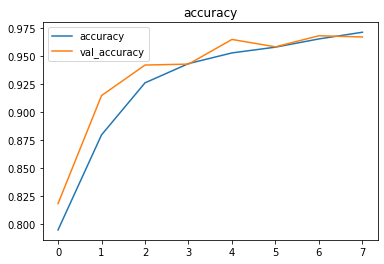

In [40]:
plot(history.history, "accuracy", "val_accuracy")

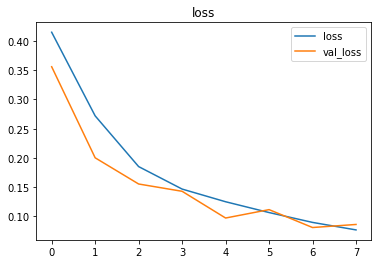

In [41]:
plot(history.history, "loss", "val_loss")

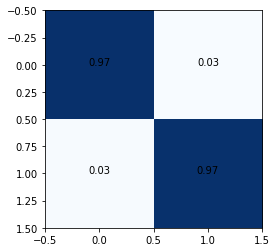

In [42]:
ypred = model.predict(xtest)

cm = confusion_matrix(ytest.argmax(axis=1), ypred.argmax(axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="black")


plt.imshow(cm, cmap=plt.cm.Blues)

In [43]:
print("The distribution of test set labels")
print(test[187].value_counts())

print('F1_score = ', f1_score(ytest.argmax(axis=1), ypred.argmax(axis=1), average = 'macro'))

The distribution of test set labels
1.0    2602
0.0    1036
Name: 187, dtype: int64
F1_score =  0.9598726310319061
